In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/WhenPigsFlyContext/baselines/IVSN

! pip install ml-collections
!pip3 install pickle5

In [2]:
import sys
import cv2
from google.colab.patches import cv2_imshow
import time
from matplotlib import pyplot as plt
from tqdm import tqdm, trange
import numpy as np
import pandas as pd
import pickle
import pickle5 as pickle5
import random
from random import sample
import copy

import os
import shutil
from PIL import Image, ImageDraw

import torch
from torch.utils.data import Dataset
from torchvision.transforms.functional import to_tensor, normalize, to_pil_image
from torchvision import transforms

from utils import *
from SCEGRAM.SCEGRAM import SCEGRAM
sys.path.append("..")

In [4]:
# with open("[CDF]SCEGRAM_invariant_target_by_category.pkl", "rb") as tf:
#     ourmodel_bin_info = pickle5.load(tf) 

# with open("SCEGRAM(invariant)_bin_IVSN_accu_performance_all.pkl", "rb") as tf:
#     IVSN_bin_info = pickle.load(tf) 

with open("../results/SCEGRAM/SCEGRAM(invariant_bin1_2)_IVSN_res.pkl", "rb") as tf:
    IVSN_accu = pickle.load(tf) 

# with open("../results/SCEGRAM/SCEGRAM(invariant)_IVSN_CON_accu_performance.pkl", "rb") as tf:
#     IVSN_CON_accu = pickle.load(tf) 

# with open("../results/SCEGRAM/SCEGRAM(invariant)_IVSN_INCON_accu_performance.pkl", "rb") as tf:
#     IVSN_INCON_accu = pickle.load(tf) 

In [6]:
IVSN_accu.keys()

dict_keys(['combined_accu', 'con_accu', 'incon_accu', 'con_[0,25)', 'con_[25,50)', 'incon_[0,25)', 'incon_[25,50)', 'scanpath', 'attention_map'])

In [9]:
len(IVSN_accu['con_[0,25)']) + len(IVSN_accu['con_[25,50)'])

32

In [10]:
len(IVSN_accu['incon_[0,25)']) + len(IVSN_accu['incon_[25,50)'])

155

In [ ]:
ourmodel_bin_info.keys()

dict_keys(['con_(0, 25]', 'con_(25, 50]', 'con_(50, 75]', 'con_(75, 100]', 'incon_(0, 25]', 'combined_(0, 25]', 'incon_(25, 50]', 'combined_(25, 50]', 'incon_(50, 75]', 'combined_(50, 75]', 'incon_(75, 100]', 'combined_(75, 100]', 'combined_all', 'con_all', 'incon_all'])

In [ ]:
IVSN_bin_info.keys()

dict_keys(['(0, 25]', '(25, 50]', '(50, 75]', '(75, 100]', 'con_(0, 25]', 'con_(25, 50]', 'con_(50, 75]', 'con_(75, 100]', 'incon_(0, 25]', 'incon_(25, 50]', 'incon_(50, 75]', 'incon_(75, 100]'])

In [ ]:
ourmodel_accu = [0] + ourmodel_bin_info['combined_all'].tolist()
ourmodel_CON_accu = [0] + ourmodel_bin_info['con_all'].tolist()
ourmodel_INCON_accu = [0] + ourmodel_bin_info['incon_all'].tolist()

ourmodel_0_25_accu = [0] + ourmodel_bin_info['combined_(0, 25]'].tolist()
ourmodel_25_50_accu = [0] + ourmodel_bin_info['combined_(25, 50]'].tolist()
ourmodel_50_75_accu = [0] + ourmodel_bin_info['combined_(50, 75]'].tolist()
ourmodel_75_100_accu = [0] + ourmodel_bin_info['combined_(75, 100]'].tolist()

ourmodel_CON_0_25_accu = [0] + ourmodel_bin_info['con_(0, 25]'].tolist()
ourmodel_CON_25_50_accu = [0] + ourmodel_bin_info['con_(25, 50]'].tolist()
ourmodel_CON_50_75_accu = [0] + ourmodel_bin_info['con_(50, 75]'].tolist()
ourmodel_CON_75_100_accu = [0] + ourmodel_bin_info['con_(75, 100]'].tolist()

ourmodel_INCON_0_25_accu = [0] + ourmodel_bin_info['incon_(0, 25]'].tolist()
ourmodel_INCON_25_50_accu = [0] + ourmodel_bin_info['incon_(25, 50]'].tolist()
ourmodel_INCON_50_75_accu = [0] + ourmodel_bin_info['incon_(50, 75]'].tolist()
ourmodel_INCON_75_100_accu = [0] + ourmodel_bin_info['incon_(75, 100]'].tolist()

In [ ]:
IVSN_0_25_accu = IVSN_bin_info['(0, 25]']
IVSN_25_50_accu = IVSN_bin_info['(25, 50]']
IVSN_50_75_accu = IVSN_bin_info['(50, 75]']
IVSN_75_100_accu = IVSN_bin_info['(75, 100]']

IVSN_CON_0_25_accu = IVSN_bin_info['con_(0, 25]']
IVSN_CON_25_50_accu = IVSN_bin_info['con_(25, 50]']
IVSN_CON_50_75_accu = IVSN_bin_info['con_(50, 75]']
IVSN_CON_75_100_accu = IVSN_bin_info['con_(75, 100]']

IVSN_INCON_0_25_accu = IVSN_bin_info['incon_(0, 25]']
IVSN_INCON_25_50_accu = IVSN_bin_info['incon_(25, 50]']
IVSN_INCON_50_75_accu = IVSN_bin_info['incon_(50, 75]']
IVSN_INCON_75_100_accu = IVSN_bin_info['incon_(75, 100]']

Text(0, 0.5, 'Cumulative performance')

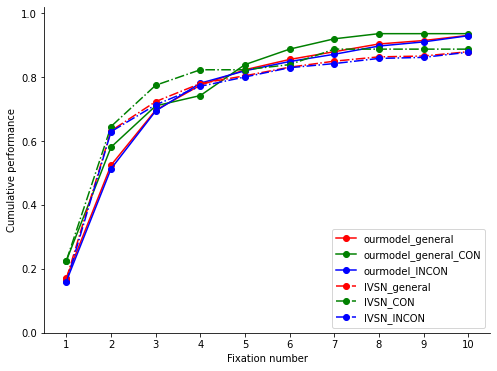

In [ ]:
# general con incon
plt.figure(figsize=(8, 6))
l1, = plt.plot(range(1,11), ourmodel_accu[1:11], color ='red', marker = 'o', linestyle = '-')
l2, = plt.plot(range(1,11), ourmodel_CON_accu[1:11], color ='green', marker = 'o', linestyle = '-')
l3, = plt.plot(range(1,11), ourmodel_INCON_accu[1:11], color ='blue', marker = 'o', linestyle = '-')

l4, = plt.plot(range(1,11), IVSN_accu[1:11], color ='red', marker = 'o', linestyle = '-.')
l5, = plt.plot(range(1,11), IVSN_CON_accu[1:11], color ='green', marker = 'o', linestyle = '-.')
l6, = plt.plot(range(1,11), IVSN_INCON_accu[1:11], color ='blue', marker = 'o', linestyle = '-.')


plt.legend([l1, l2, l3, l4, l5, l6], ["ourmodel_general", "ourmodel_general_CON", "ourmodel_INCON", "IVSN_general", "IVSN_CON", "IVSN_INCON"], loc='lower right')
plt.axis([0.5, 10.5, 0, 1.02])
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Fixation number')
plt.ylabel('Cumulative performance')

Text(0, 0.5, 'Cumulative performance')

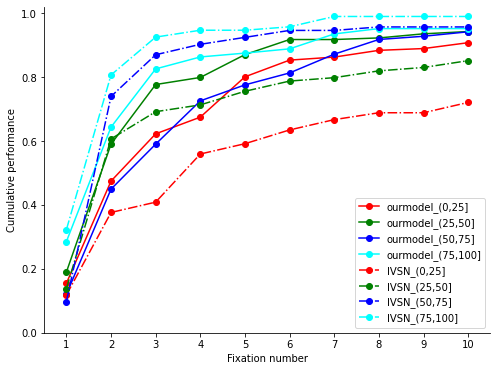

In [ ]:
# general bin
plt.figure(figsize=(8, 6))
l1, = plt.plot(range(1,11), ourmodel_0_25_accu[1:11], color ='red', marker = 'o', linestyle = '-')
l2, = plt.plot(range(1,11), ourmodel_25_50_accu[1:11], color ='green', marker = 'o', linestyle = '-')
l3, = plt.plot(range(1,11), ourmodel_50_75_accu[1:11], color ='blue', marker = 'o', linestyle = '-')
l4, = plt.plot(range(1,11), ourmodel_75_100_accu[1:11], color ='aqua', marker = 'o', linestyle = '-')

l5, = plt.plot(range(1,11), IVSN_0_25_accu[1:11], color ='red', marker = 'o', linestyle = '-.')
l6, = plt.plot(range(1,11), IVSN_25_50_accu[1:11], color ='green', marker = 'o', linestyle = '-.')
l7, = plt.plot(range(1,11), IVSN_50_75_accu[1:11], color ='blue', marker = 'o', linestyle = '-.')
l8, = plt.plot(range(1,11), IVSN_75_100_accu[1:11], color ='aqua', marker = 'o', linestyle = '-.')

plt.legend([l1, l2, l3, l4, l5, l6, l7, l8], ["ourmodel_(0,25]", "ourmodel_(25,50]", "ourmodel_(50,75]", "ourmodel_(75,100]", "IVSN_(0,25]", "IVSN_(25,50]", "IVSN_(50,75]", "IVSN_(75,100]"], loc='lower right')
plt.axis([0.5, 10.5, 0, 1.02])
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Fixation number')
plt.ylabel('Cumulative performance')

Text(0, 0.5, 'Cumulative performance')

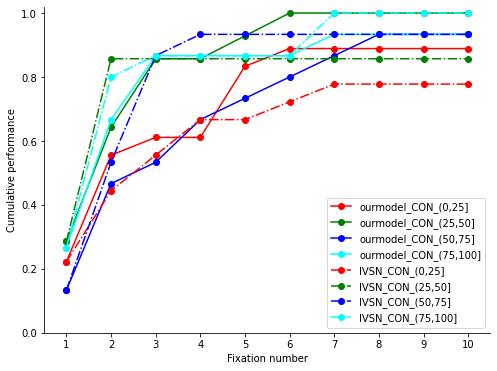

In [ ]:
# con bin
plt.figure(figsize=(8, 6))
l1, = plt.plot(range(1,11), ourmodel_CON_0_25_accu[1:11], color ='red', marker = 'o', linestyle = '-')
l2, = plt.plot(range(1,11), ourmodel_CON_25_50_accu[1:11], color ='green', marker = 'o', linestyle = '-')
l3, = plt.plot(range(1,11), ourmodel_CON_50_75_accu[1:11], color ='blue', marker = 'o', linestyle = '-')
l4, = plt.plot(range(1,11), ourmodel_CON_75_100_accu[1:11], color ='aqua', marker = 'o', linestyle = '-')

l5, = plt.plot(range(1,11), IVSN_CON_0_25_accu[1:11], color ='red', marker = 'o', linestyle = '-.')
l6, = plt.plot(range(1,11), IVSN_CON_25_50_accu[1:11], color ='green', marker = 'o', linestyle = '-.')
l7, = plt.plot(range(1,11), IVSN_CON_50_75_accu[1:11], color ='blue', marker = 'o', linestyle = '-.')
l8, = plt.plot(range(1,11), IVSN_CON_75_100_accu[1:11], color ='aqua', marker = 'o', linestyle = '-.')

plt.legend([l1, l2, l3, l4, l5, l6, l7, l8], ["ourmodel_CON_(0,25]", "ourmodel_CON_(25,50]", "ourmodel_CON_(50,75]", "ourmodel_CON_(75,100]", "IVSN_CON_(0,25]", "IVSN_CON_(25,50]", "IVSN_CON_(50,75]", "IVSN_CON_(75,100]"], loc='lower right')
plt.axis([0.5, 10.5, 0, 1.02])
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Fixation number')
plt.ylabel('Cumulative performance')

Text(0, 0.5, 'Cumulative performance')

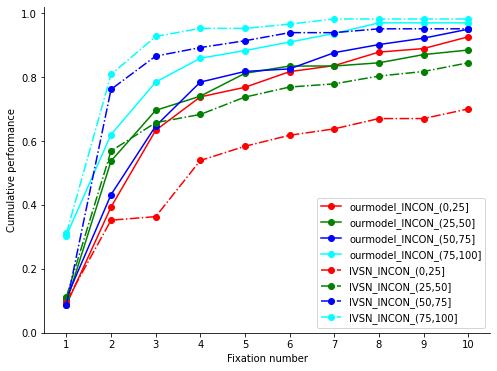

In [ ]:
# incon bin
plt.figure(figsize=(8, 6))
l1, = plt.plot(range(1,11), ourmodel_INCON_0_25_accu[1:11], color ='red', marker = 'o', linestyle = '-')
l2, = plt.plot(range(1,11), ourmodel_INCON_25_50_accu[1:11], color ='green', marker = 'o', linestyle = '-')
l3, = plt.plot(range(1,11), ourmodel_INCON_50_75_accu[1:11], color ='blue', marker = 'o', linestyle = '-')
l4, = plt.plot(range(1,11), ourmodel_INCON_75_100_accu[1:11], color ='aqua', marker = 'o', linestyle = '-')

l5, = plt.plot(range(1,11), IVSN_INCON_0_25_accu[1:11], color ='red', marker = 'o', linestyle = '-.')
l6, = plt.plot(range(1,11), IVSN_INCON_25_50_accu[1:11], color ='green', marker = 'o', linestyle = '-.')
l7, = plt.plot(range(1,11), IVSN_INCON_50_75_accu[1:11], color ='blue', marker = 'o', linestyle = '-.')
l8, = plt.plot(range(1,11), IVSN_INCON_75_100_accu[1:11], color ='aqua', marker = 'o', linestyle = '-.')

plt.legend([l1, l2, l3, l4, l5, l6, l7, l8], ["ourmodel_INCON_(0,25]", "ourmodel_INCON_(25,50]", "ourmodel_INCON_(50,75]", "ourmodel_INCON_(75,100]", "IVSN_INCON_(0,25]", "IVSN_INCON_(25,50]", "IVSN_INCON_(50,75]", "IVSN_INCON_(75,100]"], loc='lower right')
plt.axis([0.5, 10.5, 0, 1.02])
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Fixation number')
plt.ylabel('Cumulative performance')